# Assignment on explorative data analysis

Dear students,

this introductory course to machine learning has not started yet. However, an industry partner just provided us with a real data set and is now quite eager to hear whether machine learning applied to this data can open up new opportunities or improve their current business. We therefore ask you to conduct an explorative data analysis and to elaborate on how machine learning could bring our partner to a next level. We award points for non-trivial insights that emerge from your data analysis as well as for reasonable advises to our industry partner. Try your best even when you feel like being thrown in at the deep end.

## Schifffahrtsgesellschaft Vierwaldstättersee 

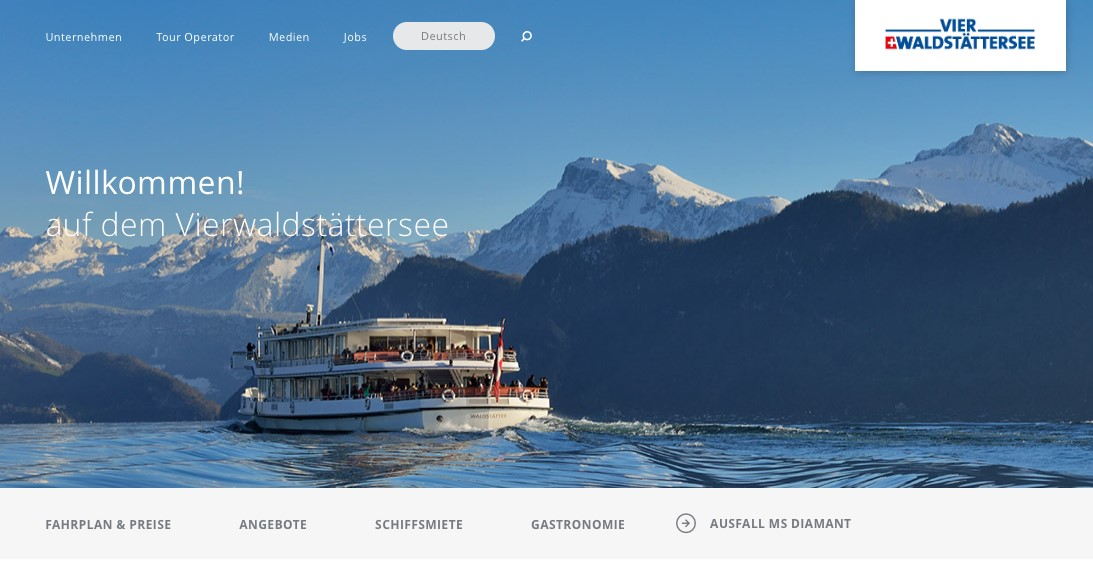

We are given a data set containing the number of passengers per day along with a lot more information. Conduct an explorative analysis, uncover interesting and non-trivial insights and speculate on how your insights would boost our partner’s business.

### Imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set()

### Load the data
Load the dataset `sgv.csv` as a pandas dataframe. *Hint: You have to use the argument `sep`*

*Click on the dots to display the solution* 

In [ ]:
df = pd.read_csv("sgv.csv", sep=";")

Verify that the data has 18 columns.

*Click on the dots to display the solution*

In [ ]:
df.shape

Display the first 5 rows.

*Click on the dots to display the solution*

In [ ]:
df.head(n=5)

It looks like the date is defined in 3 separate columns. Let's merge them together

In [ ]:
df['Date'] = df['Month'].astype(str) + '-' + df['Day_in_Month'].astype(str) + '-' + df['Year'].astype(str)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.head()

### Handle datatypes

It's always a good idea to take a look at the data types. 

Print the datatype of each column.

*Click on the dots to display the solution*

In [ ]:
df.dtypes

The columns *Month* and *Day* are categorical and nominal. 

Encode them as pandas datatype `categorical` (you can use [pd.DataFrame.astype()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html)) and print the dtypes afterwards.

*Click on the dots to display the solution*

In [ ]:
df.Month = df.Month.astype('category')
df.Day = df.Day.astype('category')
df.dtypes

### Check for duplicates
Let's begin by checking for duplicate rows. With the data at hand, exact duplicates should not occur. Exact duplicates thus hint at an anomaly from entering, processing or extracting the data (which is in fact very common).

Find out if there are rows that are exact duplicates. If there are, examine and possibly drop them. You can use [pd.DataFrame.duplicated()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html) and [pd.DataFrame.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html).

Check if there are any - *Click on the dots to display the solution*

In [ ]:
# check if they are any
df.duplicated().any()

There are no duplicates in our dataset. If there would be any, we could display and drop them with the following commands:

Display duplicates: *Click on the dots to display the solution*

In [ ]:

df[df.duplicated(keep=False)].head(n=10)

Drop the duplicates: *Click on the dots to display the solution*

In [ ]:
# The duplicates could be dropped by using the following command:
df.drop_duplicates(inplace=True)

### Null Values
Check if there are any null values in this dataset and replace them with the mean.

Check if there are any null values: *Click on the dots to display the solution*

In [ ]:
df.isna().any() # add another .any() to aggregate to a single Boolean

It appears that the columns 'wind' and 'snow' have some null values. We replace it with the mean: *Click on the dots to display the solution*

In [ ]:
df = df.fillna(df.mean())

### Data ranges

Check the data ranges by examing the minimum and maximum value of each column. Comment your findings and fix the errors.
You can use the [pd.DataFrame.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) method.

Examine the minimum and maximum values: *Click on the dots to display the solution*

In [ ]:
df.describe()

It appears that the maximum value of sunshine is **101%**. You can easily fix this by using the following command:

*Click on the dots to display the solution* 

In [ ]:
df["Sunshine_Percentage"].values[df["Sunshine_Percentage"] > 100] = 100

### Plot the data
To get a better understanding we often plot the data.

Plot the number of passengers over time and try to interpret the data.

*Click on the dots to display the solution* 

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
df.Passengers.plot(title="Passengers over time", ax=ax)

Here we see some periodic patterns which may be related to seasonal effects (winter and summer). At this stage, we perform a data analysis for a better understanding of the effects and identify possible outliers.

### Correlation analysis
Implement a correlation analysis for the given dataset. Comment your findings.

Plot correlations - *Click on the dots to display the solution* 

In [ ]:
plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn_r', linewidths=0.5, fmt='.2f')

In the correlation matrix above we can see some correlation
* The temperature correlates highly with the number of passengers
* The percentage of sunshine correlates with the number of passengers

### Outliers
Let's take a look at outliers. A boxplot is a very useful graphical representation of a five number summary together with potential outliers. Outliers are displayed as small circles above or below the boxplot.

We create a boxplot for every numerical value.

In [ ]:
numerical_cols = ['Passengers', 'Temperature_Midday', 'Snow_5Days', 'Wind', 'Temperature_Deviation',
                  'Temperature_Max', 'Temperature_Min', 'Temperature_Evening', 'Precipiation', 'Precipiation_5Days']
_ = df.loc[:, numerical_cols].plot(kind='box', subplots=True, layout=(5, 2), figsize=(10, 18), sharex=False)

According to the rule that values at least $1.5 \cdot \text{IQR}$ above the 3rd quartile or below the 1st quartile are considered as outliers, we have many of those (the circles in the boxplot). However, as we already have checked the validity of the data ranges, we assume that these are in fact valid, but extreme samples.

## Sanity check
It often makes sense to manually check the dataset for logical issues. In our case we could check if there were any passengers when there was a revision or if there was snow at unexpected times.

### Amount of passengers during revisions
During revisions no ships are in use. Therefore, the amount of passengers during this period is expected to be zero. 
Check if this is the case and fix the error.

*Click on the dots to display the solution* 

In [ ]:
df[(df.Revision == 1) & (df.Passengers > 0)].head()

Fix the error: *Click on the dots to display the solution* 

In [ ]:
df.Passengers.values[df.Revision==1] = 0

### Compare min/max temperature

For each day, there is a minumum and maximum temperature recorded. 
Check if the minimum temperature is smaller than the maximum temperature.

Compare min/max temperature - *Click on the dots to display the solution* 

In [ ]:
(df["Temperature_Min"] < df["Temperature_Max"]).all()

### Take a closer look to the snow distribution over the months

Lets convert our dataset into a matrix where we can see the average amount of snow for each month per year.

In [ ]:
pd.pivot_table(df, index=[df.Date.dt.month, "Month"], columns=["Year"], values=["Snow_5Days"])

Take a look at the table above. Comment your findings and try to explain how these anomalies could have occured.

Findings:

* There was snow during the summer in 2007 and 2008
* The amount of snow remained constant from april 2007 till september 2008

Now we want to clean these errors. 
Set the amount of snow for months june, july, august, september and october to zero.

*Click on the dots to display the solution* 

In [ ]:
df.Snow_5Days.values[df.Month.isin(["June", "July", "August", "September", "October"])] = 0

## Automatic Data Quality Assessment
[Pandas Profiling](https://github.com/pandas-profiling/pandas-profiling) is pretty neat python package which allows us to automatically generate a profile report for a data frame. Let's try it out on our dataset and check whether it recognizes that there were some missing snow records.

*Note*: You might run into issues with some browsers. We recommend you to use the Chrome Browser. Alterantively you can save the report as html.

In [ ]:
import pandas_profiling
df2 = pd.read_csv("sgv.csv", sep=";")
profile = df2.profile_report(html={'style':{'full_width':True}})
# Save report uncomment line below, if you want to save the report
#profile.to_file(output_file="sgv-profile.html")
profile

## Assignment
Now it's your turn. Open the ILIAS quiz **Data Quality Assessment** and answer the questions.

Use these cells to answer the questions